<a href="https://colab.research.google.com/github/MikickaMonika/projekty-grupowe/blob/main/project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import plotly.graph_objs as go
from plotly.offline import iplot
import pandas as pd
import numpy as np
from pandas.api.types import CategoricalDtype
from plotnine import *
from plotnine.data import mpg
import seaborn as sns
from IPython.display import display
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
%matplotlib inline

In [ ]:
df = pd.read_csv('epi_r.csv')

In [ ]:
df.head()

,title,rating,calories,protein,fat,sodium,#cakeweek,#wasteless,22-minute meals,3-ingredient recipes,...,yellow squash,yogurt,yonkers,yuca,zucchini,cookbooks,leftovers,snack,snack week,turkey
0,"Lentil, Apple, and Turkey Wrap",2.500,426.0,30.0,7.0,559.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,Boudin Blanc Terrine with Red Onion Confit,4.375,403.0,18.0,23.0,1439.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Potato and Fennel Soup Hodge,3.750,165.0,6.0,7.0,165.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Mahi-Mahi in Tomato Olive Sauce,5.000,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Spinach Noodle Casserole,3.125,547.0,20.0,32.0,452.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df.dtypes

title          object
rating        float64
calories      float64
protein       float64
fat           float64
               ...   
cookbooks     float64
leftovers     float64
snack         float64
snack week    float64
turkey        float64
Length: 680, dtype: object

In [ ]:
df.isnull().sum()

title            0
rating           0
calories      4117
protein       4162
fat           4183
              ... 
cookbooks        0
leftovers        0
snack            0
snack week       0
turkey           0
Length: 680, dtype: int64

In [ ]:
df.isnull().sum()*100/len(df)

title          0.000000
rating         0.000000
calories      20.531618
protein       20.756034
fat           20.860762
                ...    
cookbooks      0.000000
leftovers      0.000000
snack          0.000000
snack week     0.000000
turkey         0.000000
Length: 680, dtype: float64

In [ ]:
df.describe()

,rating,calories,protein,fat,sodium,#cakeweek,#wasteless,22-minute meals,3-ingredient recipes,30 days of groceries,...,yellow squash,yogurt,yonkers,yuca,zucchini,cookbooks,leftovers,snack,snack week,turkey
count,20052.000000,1.593500e+04,15890.000000,1.586900e+04,1.593300e+04,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,...,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000
mean,3.714467,6.322958e+03,100.160793,3.468775e+02,6.225975e+03,0.000299,0.000050,0.000848,0.001346,0.000349,...,0.001247,0.026332,0.000050,0.000299,0.014861,0.000150,0.000349,0.001396,0.000948,0.022741
std,1.340829,3.590460e+05,3840.318527,2.045611e+04,3.333182e+05,0.017296,0.007062,0.029105,0.036671,0.018681,...,0.035288,0.160123,0.007062,0.017296,0.121001,0.012231,0.018681,0.037343,0.030768,0.149080
min,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.750000,1.980000e+02,3.000000,7.000000e+00,8.000000e+01,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.375000,3.310000e+02,8.000000,1.700000e+01,2.940000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,4.375000,5.860000e+02,27.000000,3.300000e+01,7.110000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,5.000000,3.011122e+07,236489.000000,1.722763e+06,2.767511e+07,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
df.dropna(inplace=True)

In [ ]:
df[df.duplicated()]

,title,rating,calories,protein,fat,sodium,#cakeweek,#wasteless,22-minute meals,3-ingredient recipes,...,yellow squash,yogurt,yonkers,yuca,zucchini,cookbooks,leftovers,snack,snack week,turkey
521,Spiced Pita Toasts,3.750,21.0,0.0,1.0,38.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
601,Orange Balsamic Glaze,3.750,194.0,2.0,3.0,697.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
717,Garlic Baguette Crumbs,0.000,95.0,1.0,7.0,103.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
805,Golden Pineapple Chutney,4.375,262.0,2.0,1.0,438.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
834,Lemon Vinaigrette,3.750,614.0,0.0,68.0,124.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20027,Grilled Fillet of Beef with Tomato Ginger Vina...,4.375,738.0,42.0,62.0,344.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20032,4-3-2-1 Spice Rub,4.375,16.0,0.0,0.0,2292.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20039,Cauliflower Purée,3.125,364.0,11.0,28.0,642.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20041,Chicken with White Wine and Herbs,2.500,843.0,59.0,59.0,351.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df.drop_duplicates(keep="first", inplace=True)

In [ ]:
df[df.duplicated()]

,title,rating,calories,protein,fat,sodium,#cakeweek,#wasteless,22-minute meals,3-ingredient recipes,...,yellow squash,yogurt,yonkers,yuca,zucchini,cookbooks,leftovers,snack,snack week,turkey


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14446 entries, 0 to 20051
Columns: 680 entries, title to turkey
dtypes: float64(679), object(1)
memory usage: 75.1+ MB


In [ ]:
df_length= len(df)

In [ ]:
#threshold = 20
#df1 = df[df.columns[(df.isnull().sum() / df_length * 100) > threshold]]

In [ ]:
#df1.isnull().sum()*100/len(df)

In [ ]:
df.head()

,title,rating,calories,protein,fat,sodium,#cakeweek,#wasteless,22-minute meals,3-ingredient recipes,...,yellow squash,yogurt,yonkers,yuca,zucchini,cookbooks,leftovers,snack,snack week,turkey
0,"Lentil, Apple, and Turkey Wrap",2.500,426.0,30.0,7.0,559.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,Boudin Blanc Terrine with Red Onion Confit,4.375,403.0,18.0,23.0,1439.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Potato and Fennel Soup Hodge,3.750,165.0,6.0,7.0,165.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Spinach Noodle Casserole,3.125,547.0,20.0,32.0,452.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,The Best Blts,4.375,948.0,19.0,79.0,1042.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df.dropna(inplace=True)

In [ ]:
df

,title,rating,calories,protein,fat,sodium,#cakeweek,#wasteless,22-minute meals,3-ingredient recipes,...,yellow squash,yogurt,yonkers,yuca,zucchini,cookbooks,leftovers,snack,snack week,turkey
0,"Lentil, Apple, and Turkey Wrap",2.500,426.0,30.0,7.0,559.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,Boudin Blanc Terrine with Red Onion Confit,4.375,403.0,18.0,23.0,1439.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Potato and Fennel Soup Hodge,3.750,165.0,6.0,7.0,165.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Spinach Noodle Casserole,3.125,547.0,20.0,32.0,452.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,The Best Blts,4.375,948.0,19.0,79.0,1042.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20047,Parmesan Puffs,3.125,28.0,2.0,2.0,64.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20048,Artichoke and Parmesan Risotto,4.375,671.0,22.0,28.0,583.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20049,Turkey Cream Puff Pie,4.375,563.0,31.0,38.0,652.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
20050,Snapper on Angel Hair with Citrus Cream,4.375,631.0,45.0,24.0,517.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
#for col in df.columns:
 # print(f"Feature name: {col}")
 # print(df[col].value_counts(), "\n")
 # kod na zliczenie wartości w kolumnie

In [ ]:
df2 = df[['title', 'rating','calories','protein','fat','sodium']].copy()

In [ ]:
df2

,title,rating,calories,protein,fat,sodium
0,"Lentil, Apple, and Turkey Wrap",2.500,426.0,30.0,7.0,559.0
1,Boudin Blanc Terrine with Red Onion Confit,4.375,403.0,18.0,23.0,1439.0
2,Potato and Fennel Soup Hodge,3.750,165.0,6.0,7.0,165.0
4,Spinach Noodle Casserole,3.125,547.0,20.0,32.0,452.0
5,The Best Blts,4.375,948.0,19.0,79.0,1042.0
...,...,...,...,...,...,...
20047,Parmesan Puffs,3.125,28.0,2.0,2.0,64.0
20048,Artichoke and Parmesan Risotto,4.375,671.0,22.0,28.0,583.0
20049,Turkey Cream Puff Pie,4.375,563.0,31.0,38.0,652.0
20050,Snapper on Angel Hair with Citrus Cream,4.375,631.0,45.0,24.0,517.0


In [ ]:
df2.reset_index(inplace=True)

In [ ]:
df2

,index,title,rating,calories,protein,fat,sodium
0,0,"Lentil, Apple, and Turkey Wrap",2.500,426.0,30.0,7.0,559.0
1,1,Boudin Blanc Terrine with Red Onion Confit,4.375,403.0,18.0,23.0,1439.0
2,2,Potato and Fennel Soup Hodge,3.750,165.0,6.0,7.0,165.0
3,4,Spinach Noodle Casserole,3.125,547.0,20.0,32.0,452.0
4,5,The Best Blts,4.375,948.0,19.0,79.0,1042.0
...,...,...,...,...,...,...,...
14441,20047,Parmesan Puffs,3.125,28.0,2.0,2.0,64.0
14442,20048,Artichoke and Parmesan Risotto,4.375,671.0,22.0,28.0,583.0
14443,20049,Turkey Cream Puff Pie,4.375,563.0,31.0,38.0,652.0
14444,20050,Snapper on Angel Hair with Citrus Cream,4.375,631.0,45.0,24.0,517.0


In [ ]:
df2.max()
df2.mean()

<ipython-input-207-26a9598a51de>:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.


index       9688.529281
rating         3.763585
calories    6647.251419
protein       92.380728
fat          363.495154
sodium      6598.615326
dtype: float64

In [ ]:
df2 = df.copy()
df2 = df2[df2['calories']<2500]

df2 = df.copy()
df2 = df2[df2['protein']<200]

df2 = df.copy()
df2 = df2[df2['sodium']<1000]

df2 = df.copy()
df2 = df2[df2['fat']<30]

In [ ]:
df2.head()

,title,rating,calories,protein,fat,sodium,#cakeweek,#wasteless,22-minute meals,3-ingredient recipes,...,yellow squash,yogurt,yonkers,yuca,zucchini,cookbooks,leftovers,snack,snack week,turkey
0,"Lentil, Apple, and Turkey Wrap",2.500,426.0,30.0,7.0,559.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,Boudin Blanc Terrine with Red Onion Confit,4.375,403.0,18.0,23.0,1439.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Potato and Fennel Soup Hodge,3.750,165.0,6.0,7.0,165.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,Korean Marinated Beef,4.375,170.0,7.0,10.0,1272.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10,"Yams Braised with Cream, Rosemary and Nutmeg",3.750,256.0,4.0,5.0,30.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
corr = df2.corr()
corr

,rating,calories,protein,fat,sodium,#cakeweek,#wasteless,22-minute meals,3-ingredient recipes,30 days of groceries,...,yellow squash,yogurt,yonkers,yuca,zucchini,cookbooks,leftovers,snack,snack week,turkey
rating,1.000000,0.107475,0.108057,0.182488,0.007849,-0.003998,0.009673,0.018394,-0.042813,0.010458,...,-0.003223,-0.018485,0.009673,0.010234,0.008673,0.000559,-0.046394,-0.047787,-0.007767,-0.004778
calories,0.107475,1.000000,0.597856,0.615479,0.079073,0.007386,-0.005521,0.044830,-0.006575,0.037394,...,-0.008945,-0.036946,-0.002419,0.011920,0.000492,0.020791,0.020310,-0.014228,-0.012621,0.046945
protein,0.108057,0.597856,1.000000,0.424090,0.149281,-0.001904,-0.005360,0.039243,-0.012589,0.032018,...,-0.012050,0.005431,-0.003978,0.012787,0.007742,0.007084,0.013469,-0.011163,-0.011948,0.167567
fat,0.182488,0.615479,0.424090,1.000000,0.053699,0.004259,-0.005046,0.031011,-0.007075,0.024941,...,-0.008400,-0.029341,-0.007372,-0.006022,0.029959,0.014727,0.014765,0.000953,0.007466,0.036282
sodium,0.007849,0.079073,0.149281,0.053699,1.000000,-0.000720,-0.001045,0.007865,-0.002150,0.003895,...,-0.000729,-0.010275,-0.000075,0.001273,-0.002725,0.001838,0.001694,-0.001638,-0.001954,0.007089
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
cookbooks,0.000559,0.020791,0.007084,0.014727,0.001838,-0.000099,-0.000099,-0.000297,-0.000343,-0.000140,...,-0.000409,-0.001599,-0.000099,-0.000198,-0.001283,1.000000,-0.000172,-0.000432,-0.000329,-0.001167
leftovers,-0.046394,0.020310,0.013469,0.014765,0.001694,-0.000172,-0.000172,-0.000515,-0.000595,-0.000243,...,-0.000708,0.033927,-0.000172,-0.000343,-0.002222,-0.000172,1.000000,-0.000749,-0.000569,0.097322
snack,-0.047787,-0.014228,-0.011163,0.000953,-0.001638,-0.000432,-0.000432,-0.001297,0.064831,-0.000611,...,-0.001783,-0.006975,-0.000432,-0.000864,-0.005596,-0.000432,-0.000749,1.000000,0.760584,-0.005092
snack week,-0.007767,-0.012621,-0.011948,0.007466,-0.001954,-0.000329,-0.000329,-0.000986,-0.001139,-0.000465,...,-0.001356,-0.005305,-0.000329,-0.000657,-0.004257,-0.000329,-0.000569,0.760584,1.000000,-0.003873


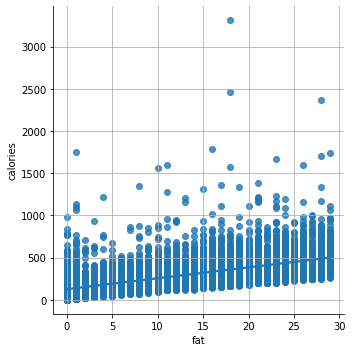

In [ ]:
sns.lmplot(y="calories", x="fat", data=df2)
plt.grid()

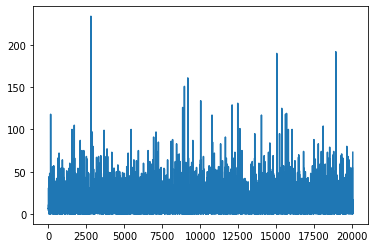

In [ ]:
fig,ax=plt.subplots()
ax.plot(df2.index,df2['protein'])
plt.show()

In [ ]:
factor = 0.2
upper_limit = df2["calories"].mean() + df2["calories"].std() * factor
lower_limit = df2["calories"].mean() - df2["calories"].std() * factor
df2[(df2["calories"] < upper_limit) & (df2["calories"] > lower_limit)]

,title,rating,calories,protein,fat,sodium,#cakeweek,#wasteless,22-minute meals,3-ingredient recipes,...,yellow squash,yogurt,yonkers,yuca,zucchini,cookbooks,leftovers,snack,snack week,turkey
10,"Yams Braised with Cream, Rosemary and Nutmeg",3.750,256.0,4.0,5.0,30.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
29,Apricot-Cherry Shortcakes,4.375,311.0,5.0,5.0,226.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
51,Peanut Butter-Banana Muffins,3.750,275.0,6.0,13.0,242.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
54,1977 Coconut Angel Food Cake,3.750,266.0,4.0,7.0,148.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
62,Southwest Corn Bread Stuffing with Corn and Gr...,5.000,293.0,7.0,15.0,565.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19949,Blueberry-Buttermilk Chess Pie,0.000,280.0,5.0,15.0,196.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19961,Shrimp with Garlic and Toasted Bread Crumbs,4.375,251.0,18.0,12.0,826.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20014,Mixed Green Salad with Roquefort Vinaigrette,4.375,305.0,4.0,29.0,189.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20023,Roasted and Raw Carrot Salad with Avocado and ...,3.125,293.0,4.0,27.0,647.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


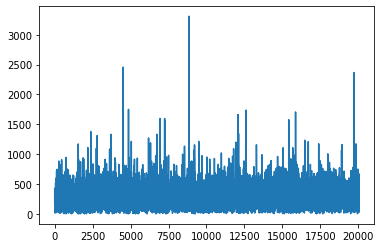

In [ ]:
fig,ax=plt.subplots()
ax.plot(df2.index,df2['calories'])
plt.show()

In [ ]:
upper_limit = df2["calories"].quantile(0.95)
lower_limit = df2["calories"].quantile(0.05)
df2[(df2["calories"] < upper_limit) & (df2["calories"] > lower_limit)]
df2.loc[(df2["calories"] > upper_limit), "calories"] = upper_limit
df2.loc[(df2["calories"] < lower_limit), "calories"] = lower_limit



In [ ]:
#(ggplot(df2)+
# aes(x='calories',y='protein', color ='rating')+
# geom_point()+
# labs(title='Kalorie a proteiny',
#      x='Kcal',y='Proteins'))

<Axes: xlabel='rating_class'>

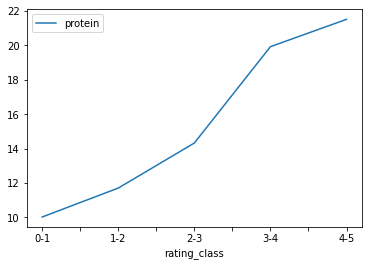

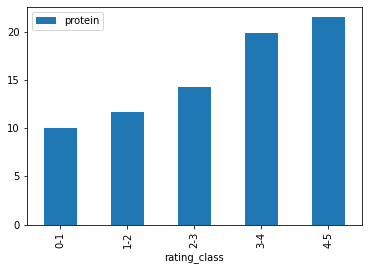

In [ ]:
df2 = df.copy()
df2 = df2[df2['calories']<2500]

bin_labels = ['0-1','1-2','2-3', '3-4', '4-5']
cut_bins = [-2,1,2,3,4,5]
df2['rating_class'] = pd.cut(df2['rating'],
                             bins=cut_bins,
                             labels=bin_labels)

plot_df = pd.DataFrame(df2.groupby(by = "rating_class")['protein'].mean())
plot_df.plot()
plot_df.plot(kind = "bar")

In [ ]:
df3 = df[['title', 'rating','calories','protein','fat','sodium']].copy()

In [ ]:
upper_lim = df3['calories'].quantile(.95) 
lower_lim = df3['calories'].quantile(.05)
df3 = df3[(df3['calories']<upper_lim) & (df3['calories']>lower_lim)]


upper_limit3 = df3["protein"].quantile(0.95)
lower_limit3 = df3["protein"].quantile(0.05)
df3 = df3[(df3["protein"] < upper_limit3) & (df3["protein"] > lower_limit3)]

upper_limit2 = df3["fat"].quantile(0.95)
lower_limit2 = df3["fat"].quantile(0.05)
df3 = df3[(df3["fat"] < upper_limit2) & (df3["fat"] > lower_limit2)]

upper_limit4 = df3["sodium"].quantile(0.95)
lower_limit4 = df3["sodium"].quantile(0.05)
df3 = df3[(df3["sodium"] < upper_limit4) & (df3["sodium"] > lower_limit4)]

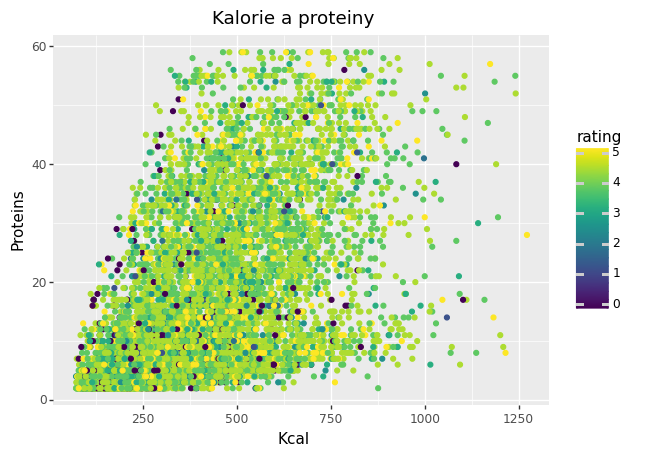

<ggplot: (8755725536820)>

In [ ]:
(ggplot(df3)+
 aes(x='calories',y='protein', color ='rating')+
 geom_point()+
 labs(title='Kalorie a proteiny',
      x='Kcal',y='Proteins'))

In [ ]:
#n=10
#fig,ax=plt.subplots(4,1,sharex=True)
#
#ax[0].plot(df3['rating'],df3['calories'],color='r')
#ax[1].plot(df3['rating'],df3['fat'],color='b')
#ax[2].plot(df3['rating'],df3['protein'],color='y')
#ax[3].plot(df3['rating'],df3['sodium'],color='black')
#ax[0].set_ylabel('kalorie')
#
#ax[0].set_title('Zestawienie rankingu z pozostałymi danymi')
#ax[2].xaxis.set_tick_params(rotation=90)
#ax[2].set_xlabel('ocena')
#
#
#ax[0].set_ylabel('kalorie')
#ax[1].set_ylabel('tłuszcz')
#ax[2].set_ylabel('białko')
#ax[3].set_ylabel('sód')


#plt.show()

<Axes: xlabel='rating'>

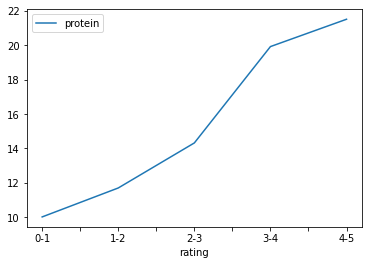

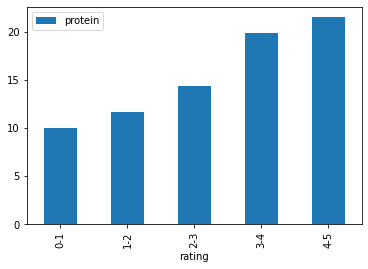

In [ ]:
df4 = df.copy()
df4 = df2[df2['calories']<2500]

bin_labels = ['0-1','1-2','2-3', '3-4', '4-5']
cut_bins = [-2,1,2,3,4,5]
df4['rating'] = pd.cut(df4['rating'],
                             bins=cut_bins,
                             labels=bin_labels)

plot_df = pd.DataFrame(df4.groupby(by = "rating")['protein'].mean())
plot_df.plot()
plot_df.plot(kind = "bar")

# wykresy dla średniej dla poszczególnych przedziałów

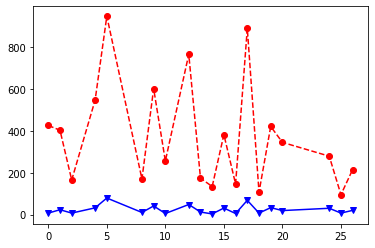

In [ ]:
n=20
fig,ax=plt.subplots()
ax.plot(df4.index[:n],df4['calories'][:n],marker='o',linestyle='--',color='r')
ax.plot(df4.index[:n],df4['fat'][:n],marker='v',linestyle='-',color='b')
plt.show()

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names


(8726, 4) (8726,)
(5584, 4) (5584,)
(1396, 4) (5584,)
(1746, 4) (1746,)


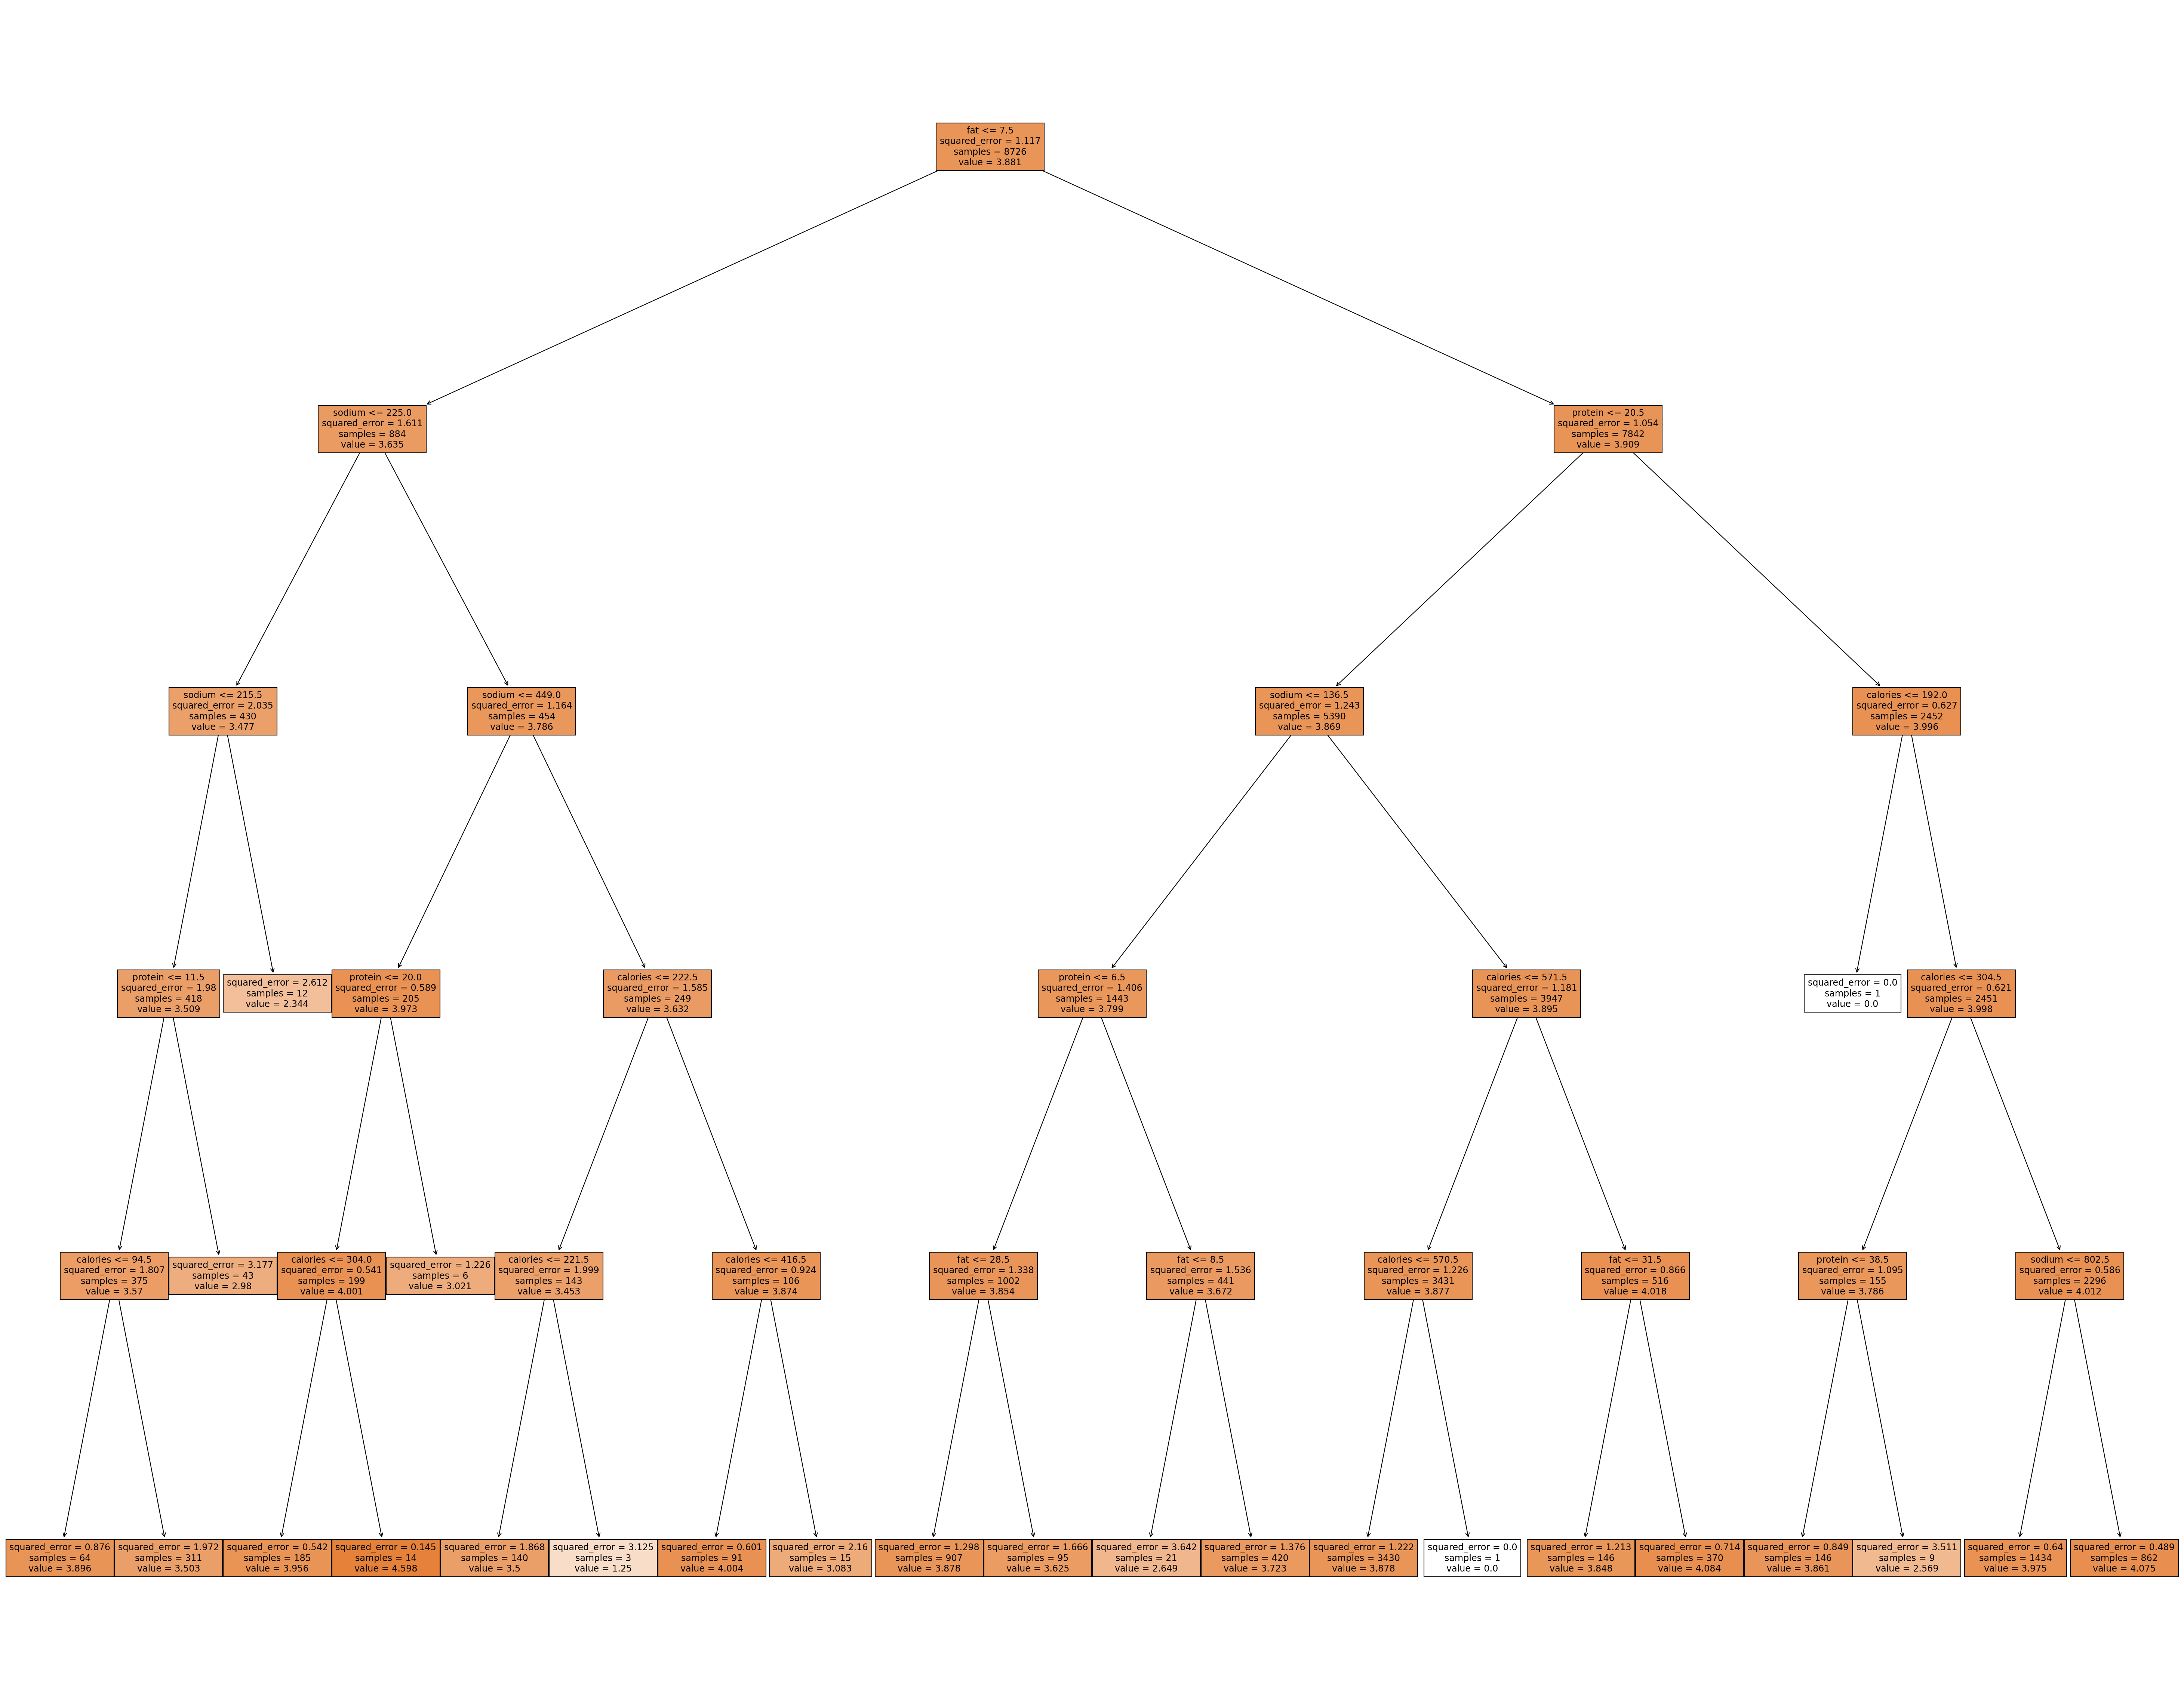

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree

X = df3[['calories','protein','sodium','fat']]
y = df3['rating']

tree_model = tree.DecisionTreeRegressor(min_samples_split=70, max_depth=5)
tree_model.fit(X,y)
tree_model.predict([[2000,150,150,70]])

fig = plt.figure(figsize=(50,40), dpi=150)
tree_plot = tree.plot_tree(tree_model, feature_names=X.columns, filled=True)

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=111)
X_train, X_val, y_train, y_val = train_test_split(X_train,y_train,test_size=0.2,random_state=111)

print(X.shape, y.shape)
print(X_train.shape, y_train.shape)
print(X_val.shape, y_train.shape)
print(X_test.shape, y_test.shape)

model1 = tree.DecisionTreeRegressor(random_state=111, min_samples_split=5)
model1.fit(X_train,y_train)

pred_1_train = model1.predict(X_train)
pred_1_val = model1.predict(X_val)

model2 = tree.DecisionTreeRegressor(random_state=111, min_samples_split=10)
model2.fit(X_train,y_train)

pred_2_train = model2.predict(X_train)
pred_2_val = model2.predict(X_val)

In [ ]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
print(mean_absolute_error(y_val,pred_1_val))
print(mean_absolute_error(y_val,pred_2_val))

0.9569752865329513
0.9168393539364169


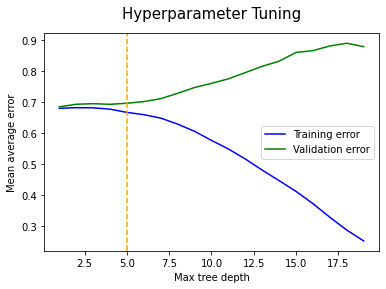

In [ ]:
max_depths = range(1,20)
training_error = []
validation_error = []
for max_depth in max_depths:
  model_1 = tree.DecisionTreeRegressor(max_depth=max_depth)
  model_1.fit(X_train, y_train)
  pred_1 = model_1.predict(X_train)
  training_error.append(mean_absolute_error(y_train, pred_1))
  pred_2 = model_1.predict(X_val)
  validation_error.append(mean_absolute_error(y_val, pred_2))
plt.plot(max_depths, training_error, color='blue', label='Training error')
plt.plot(max_depths, validation_error, color='green', label='Validation error')
plt.xlabel('Max tree depth')
plt.axvline(x=5, color='orange', linestyle='--')
plt.ylabel('Mean average error')
plt.title('Hyperparameter Tuning', pad=15, size=15)
plt.legend()

In [ ]:
tree_pred_train = tree_model.predict(X_train)  # Predykcja dla obserwacji, które nasz model już widział przy treningu
tree_pred_test = tree_model.predict(X_test)

print(tree_pred_train)
print(tree_pred_test)

[3.87809767 3.87809767 3.87809767 ... 3.9748954  3.87809767 3.87809767]
[3.87816979 3.87809767 3.87816979 ... 4.07482599 3.87809767 3.5       ]


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

#MAE
print('Train Set R2 score: '+ str(round(r2_score(y_train, tree_pred_train),2)))
print('Test Set R2 score: '+ str(round(r2_score(y_test, tree_pred_test),2)))

# R2
print('Train Set MAE score: '+ str(round(mean_absolute_error(y_train, tree_pred_train),2)))
print('Test Set MAE score: '+ str(round(mean_absolute_error(y_test, tree_pred_test),2)))

Train Set R2 score: 0.04
Test Set R2 score: 0.02
Train Set MAE score: 0.68
Test Set MAE score: 0.67


In [ ]:
feat_importance = tree_model.tree_.compute_feature_importances(normalize=False)
feat_importance = pd.concat([X.columns.to_series().reset_index(drop=True), pd.Series(feat_importance)], axis=1)
feat_importance = feat_importance.sort_values(feat_importance.columns[1], ascending = False)
feat_importance

,0,1
0,calories,0.011172
3,fat,0.010766
1,protein,0.008085
2,sodium,0.007479


In [ ]:
X = df3[['fat','calories', 'protein', 'sodium']]
y = df3['rating']
reg = LinearRegression().fit(X,y)
print(reg.intercept_)
print(reg.coef_)
print(reg.predict([[150,2000,150,70]]))

3.712559806809471
[3.24425469e-03 1.07467983e-04 2.09309795e-03 5.02033240e-05]
[4.7316129]


/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names


In [ ]:
from sklearn import datasets, linear_model
reg.fit(X_train, y_train)
Y_predicted = reg.predict(X_test)
print('Coefficients: \n', reg.coef_)
error = np.mean((reg.predict(X_test) - y_test) ** 2)
print("Residual sum of squares: {}".format(error))

Coefficients: 
 [1.05536073e-04 2.01311970e-03 3.79193043e-05 3.43281022e-03]
Residual sum of squares: 1.092955899802465
